In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import dask
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Load datasets

In [2]:
budgSln = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_sln.nc').budg_sln

In [3]:
budgFw = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_fw.nc').budg_fw
dif_ConvFw = budgFw.sel(term='tendFw')[:,:-1] - budgFw.sel(term='totalFw')[:,:-1]

In [4]:
budgSln = budgSln.sel(time=slice('1992-07-01','2015-12-31'))
dif_ConvFw = dif_ConvFw.sel(time=slice('1992-07-01','2015-12-31'))

### Plot

In [5]:
class OffsetYearLocator(dates.YearLocator):
    def __init__(self, *args, **kwargs):
        self.offset = kwargs.pop("offset", 0)
        dates.YearLocator.__init__(self,*args, **kwargs)
    def tick_values(self, vmin, vmax):
        ymin = self.base.le(vmin.year) * self.base.step - self.offset
        ymax = self.base.ge(vmax.year) * self.base.step + (self.base.step-self.offset)
        ticks = [vmin.replace(year=ymin, **self.replaced)]
        while True:
            dt = ticks[-1]
            if dt.year >= ymax:
                return dates.date2num(ticks)
            year = dt.year + self.base.step
            ticks.append(dt.replace(year=year, **self.replaced))

def format_xaxis(ax):

    years = dates.YearLocator(10,month=1,day=1)
    years1=OffsetYearLocator(2,month=1,day=1, offset=1)
    dfmt = dates.DateFormatter('%Y')
    dfmt1 = dates.DateFormatter('%y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(years1)
    ax.xaxis.set_major_formatter(dfmt)
    ax.xaxis.set_minor_formatter(dfmt1)
    ax.get_xaxis().set_tick_params(which='major', pad=15)

    plt.setp(ax.get_xmajorticklabels(), rotation=0, weight="bold", ha="center")

In [6]:
import datetime

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


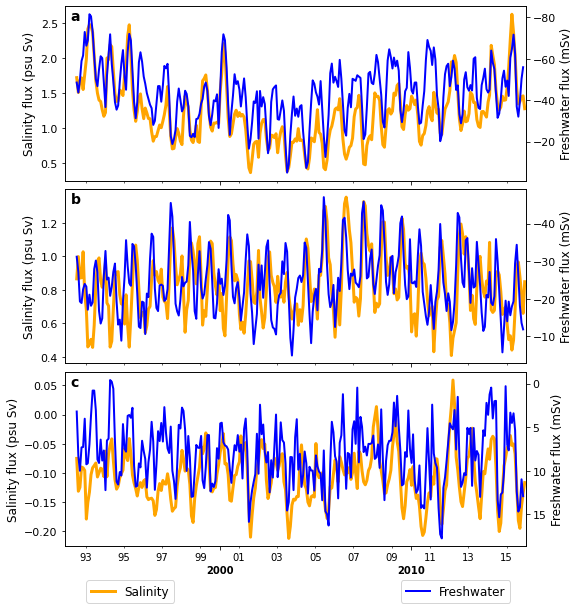

In [8]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 10))

axs[0].plot(budgSln.time, budgSln.sel(region='spna',term='dif_ConvSln'), lw=3, color='orange',label='Salinity')
axs[0].set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
axs[0].yaxis.set_tick_params(labelsize=11)
axs[0].set_ylabel('Salinity flux (psu Sv)', color='k',fontsize=12)
axs[0].text(0.013,0.92, 'a', fontsize=14, fontweight='bold', transform=axs[0].transAxes)
ax2 = axs[0].twinx()
ax2.plot(dif_ConvFw.time, dif_ConvFw.sel(region='spna')*1e3, lw=2, color='blue',label='Freshwater')
ax2.set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
#ax2.set_ylim([-0.5,0.5])
ax2.invert_yaxis()
ax2.yaxis.set_tick_params(labelsize=11)
ax2.set_ylabel(r'Freshwater flux (mSv)', color='k', fontsize=12)

axs[1].plot(budgSln.time, budgSln.sel(region='nsea',term='dif_ConvSln'), lw=3, color='orange',label='Salinity')
axs[1].set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
axs[1].yaxis.set_tick_params(labelsize=11)
axs[1].set_ylabel('Salinity flux (psu Sv)', color='k',fontsize=12)
axs[1].text(0.013,0.92, 'b', fontsize=14, fontweight='bold', transform=axs[1].transAxes)
ax2 = axs[1].twinx()
ax2.plot(dif_ConvFw.time, dif_ConvFw.sel(region='nsea')*1e3, lw=2, color='blue',label='Freshwater')
ax2.set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
#ax2.set_ylim([-0.5,0.5])
ax2.invert_yaxis()
ax2.yaxis.set_tick_params(labelsize=11)
ax2.set_ylabel(r'Freshwater flux (mSv)', color='k', fontsize=12)

axs[2].plot(budgSln.time, budgSln.sel(region='lsea',term='dif_ConvSln'), lw=3, color='orange',label='Salinity')
axs[2].set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
axs[2].yaxis.set_tick_params(labelsize=11)
axs[2].set_ylabel('Salinity flux (psu Sv)', color='k',fontsize=12)
axs[2].text(0.013,0.92, 'c', fontsize=14, fontweight='bold', transform=axs[2].transAxes)
ax2 = axs[2].twinx()
ax2.plot(dif_ConvFw.time, dif_ConvFw.sel(region='lsea')*1e3, lw=2, color='blue',label='Freshwater')
ax2.set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
#ax2.set_ylim([-0.5,0.5])
ax2.invert_yaxis()
ax2.yaxis.set_tick_params(labelsize=11)
ax2.set_ylabel(r'Freshwater flux (mSv)', color='k', fontsize=12)
format_xaxis(axs[2])
axs[2].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.25, -0.16), ncol=1, fontsize=12)
ax2.legend(frameon=True, fancybox=True, bbox_to_anchor=(0.98, -0.16), ncol=1, fontsize=12)

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)

plt.savefig('/mnt/efs/figure.png')
plt.savefig('/mnt/efs/figure.eps')
plt.savefig('/mnt/efs/figure.pdf')
plt.show()

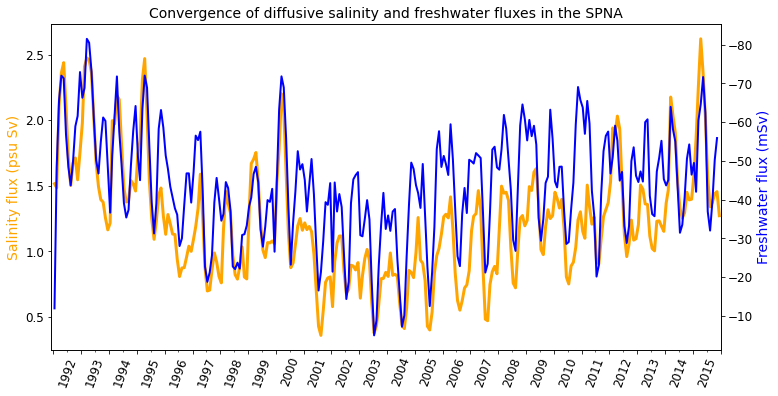

In [45]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title(r'Convergence of diffusive salinity and freshwater fluxes in the SPNA',fontsize=14)

#ax1.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax1.plot(budgSln.time, budgSln.sel(region='spna',term='dif_ConvSln'), lw=3, color='orange',label='Salinity')

ax1.set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
#ax1.set_ylim([-310,310])
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_ylabel('Salinity flux (psu Sv)', color='orange',fontsize=14)
ax1.xaxis.set_major_locator(dates.YearLocator())
ax1.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax1.xaxis.get_minor_ticks():
    tick.label.set_fontsize(12)

plt.setp( ax1.xaxis.get_minorticklabels(), rotation=70 )

ax2 = ax1.twinx()
ax2.plot(dif_ConvFw.time, dif_ConvFw.sel(region='spna')*1e3, lw=2, color='blue',label='Freshwater')
ax2.set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
#ax2.set_ylim([-0.5,0.5])
ax2.invert_yaxis()
ax2.yaxis.set_tick_params(labelsize=12)
ax2.set_ylabel(r'Freshwater flux (mSv)', color='b', fontsize=14)

ax2.xaxis.set_major_locator(dates.YearLocator())
ax2.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax2.xaxis.get_minor_ticks():
    tick.label.set_fontsize(12)

plt.setp( ax2.xaxis.get_minorticklabels(), rotation=70 )

plt.savefig('/mnt/efs/figure.png')
plt.savefig('/mnt/efs/figure.eps')
plt.savefig('/mnt/efs/figure.pdf')
plt.show()

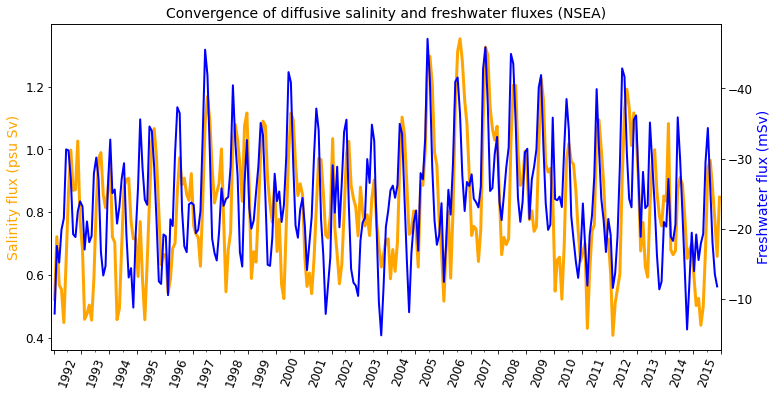

In [46]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title(r'Convergence of diffusive salinity and freshwater fluxes (NSEA)',fontsize=14)

#ax1.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax1.plot(budgSln.time, budgSln.sel(region='nsea',term='dif_ConvSln'), lw=3, color='orange',label='Salinity')
ax1.set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
#ax1.set_ylim([-310,310])
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_ylabel('Salinity flux (psu Sv)', color='orange',fontsize=14)
ax1.xaxis.set_major_locator(dates.YearLocator())
ax1.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax1.xaxis.get_minor_ticks():
    tick.label.set_fontsize(12)

plt.setp( ax1.xaxis.get_minorticklabels(), rotation=70 )

ax2 = ax1.twinx()
ax2.plot(dif_ConvFw.time, dif_ConvFw.sel(region='nsea')*1e3, lw=2, color='blue',label='Freshwater')
ax2.set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
#ax2.set_ylim([-0.5,0.5])
ax2.invert_yaxis()
ax2.yaxis.set_tick_params(labelsize=12)
ax2.set_ylabel(r'Freshwater flux (mSv)', color='b', fontsize=14)

ax2.xaxis.set_major_locator(dates.YearLocator())
ax2.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax2.xaxis.get_minor_ticks():
    tick.label.set_fontsize(12)

plt.setp( ax2.xaxis.get_minorticklabels(), rotation=70 )

plt.savefig('/mnt/efs/figure.png')
plt.savefig('/mnt/efs/figure.eps')
plt.savefig('/mnt/efs/figure.pdf')
plt.show()